# Определение перспективного тарифа для телеком компании

В нашем распоряжении 5 таблиц с данными о действиях 500 клиентов федерального оператора сотовой связи "Мегалайн". Наша задача  проанализировать поведение клиентов и определить, какой из представленных тарифов лучше.

###### Данное исследование разделим на несколько частей.

##### Часть 1. Изучение общей информации:
* [1. Изученеие файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)

##### Часть 2. Подготовка данных:
* [1. Исправление некоторых ошибок в таблице.](#2-bullet)
* [2. Приведение данных к нужным типам.](#3-bullet)
* [3. Создание новой таблицы.](#4-bullet)
* [4. Помесячная выручка пользователей.](#5-bullet)


##### Часть 3. Исследование данных:
* [1. Звонки.](#6-bullet)
* [2. Интернет.](#7-bullet)
* [3. Сообщения.](#8-bullet)

##### Часть 4. Проверка гипотез:
* [1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.](#9-bullet)
* [2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.](#10-bullet)

##### Часть 4. Заключение:
* [1. Общий вывод.](#11-bullet)

 

<a id='1-bullet'></a>

## Изучение общей информации о таблице. 

Загрузим нужные нам библиотеки.

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy import stats as st

#### Загрузим первую таблицу.

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Итак, в таблице 4 столбца.

- id - уникальный номер звонка (тип object)
- call_date - дата звонка (тип object)
- duration - длительность звонка в минутах (тип float)
- user_id - идентификатор пользователя, сделавшего звонок (тип int)

Видим, что есть проблемы в данных, например, неверные типы данных в столбцах call_date и duration. Причем компания округляет время в большую сторону, поэтому столбец duration нужно будет округлить.

#### Загрузим вторую таблицу.

In [4]:
df_internet = pd.read_csv('/datasets/internet.csv', index_col=0)
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Итак, у нас 5 столбцов.

- Unnamed: 0 - столбец без названия (тип int)
- id -уникальный номер сессии (тип object)
- mb_used объём потраченного за сессию интернет-трафика в мегабайтах (тип float)
- session_date - дата интернет-сессии    (тип object)
- user_id - идентификатор пользователя         (тип int)

Также компания округляет вверх значения мегабайтов, поэтому нам придется правильно округлить столбец mb_used и перевести его в int. И еще нам придется перевести session_date во временной тип.

#### Загрузим третью таблицу.

In [6]:
df_sms = pd.read_csv('/datasets/messages.csv')
df_sms.tail()

,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [7]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


У нас 3 столбца:

- id — уникальный номер сообщения (тип object)
- message_date — дата сообщения (тип object)
- user_id — идентификатор пользователя, отправившего сообщение (тип int)

Проблема в столбце message_date. Нужно изменить тип данных.

#### Загрузим четвертую таблицу.

In [8]:
df_tarif = pd.read_csv('/datasets/tariffs.csv')
df_tarif.tail()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
df_tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице 8 столбцов и 2 строчки.

- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату в мегабайтах
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета 
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета 

#### Загрузим пятую таблицу.

In [10]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, у нас 8 колонок.

- user_id — уникальный идентификатор пользователя (тип int)
- first_name — имя пользователя (тим object)
- last_name — фамилия пользователя (тим object)
- age — возраст пользователя (тип int)
- reg_date — дата подключения тарифа (тим object)
- churn_date — дата прекращения пользования тарифом (тим object)
- city — город проживания пользователя (тим object)
- tariff — название тарифного плана (тим object)

Видим, что в колонке churn_date есть пропуски, потому что не все пользователи перестали пользоваться тарифом, поэтому убирать эти пропуски мы не будем. Для удобства придется изменить типы данных в колонках churn_date и reg_date Также существуют столбцы, которые не понадобятся нам для исследования. 

### Вывод

В данных таблицах существуют некоторые недочеты, которые нужно исправить.

<a id='2-bullet'></a>

## Предобработка данных

Из условия знаем, что минуты, мегабайты округляются в большую сторону.

In [12]:
def krug(row):
    return math.ceil(row) 

In [13]:
df_calls['duration']=df_calls['duration'].apply(krug)

In [14]:
df_internet['mb_used']=df_internet['mb_used'].apply(krug)

Теперь удалим столбцы, которые не будут использоваться в дальнейшем.

In [15]:
df_users=df_users.drop(df_users.columns[[1, 4, 5]], axis='columns')

Некоторые звонки имеют значение длины звонков 0, это значит, что абонент был либо недоступен, либо звонок не состоялся, поэтому удалим строки со звонками, длины которых 0.

In [16]:
df_calls=df_calls[df_calls['duration']!=0]

В большинстве случаев человек использует интернет весь день, и дробление ежедневного трафика не происходит, а если такое и есть, то одинаковое количество потребляемого трафика несколько раз за день -это очень странно, поэтому удалим такие дубликаты. 

In [17]:
df_internet.drop(['id'], axis='columns', inplace=True)
df_internet= df_internet.drop_duplicates()

Также мы заметили, что есть значения 0 в столбце mb_used. Это может значит, что у человека была очень плохая связь, что препятствовало подключению интернета, также возможно, что человек включил и сразу выключил интернет. Удалим такие строки.

In [18]:
df_internet=df_internet[df_internet['mb_used']!=0]

In [19]:
df_internet

,mb_used,session_date,user_id
0,113,2018-11-25,1000
1,1053,2018-09-07,1000
2,1198,2018-06-25,1000
3,551,2018-08-22,1000
4,303,2018-09-24,1000
...,...,...,...
149390,753,2018-10-11,1499
149391,319,2018-10-03,1499
149392,491,2018-12-14,1499
149394,1247,2018-11-26,1499


<a id='3-bullet'></a>

### Приведение данных к нужным типам

In [20]:
df_calls['call_date']= pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

In [21]:
df_internet['session_date']= pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

In [22]:
df_sms['message_date']= pd.to_datetime(df_sms['message_date'], format='%Y-%m-%d')

In [23]:
df_users['churn_date']= pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

In [24]:
df_users['reg_date']= pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

Мы перевели дынные по времени к временному типу данных. Перепроверим таблицы на наличие ошибок.

In [25]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162994 entries, 2 to 202606
Data columns (total 4 columns):
id           162994 non-null object
call_date    162994 non-null datetime64[ns]
duration     162994 non-null int64
user_id      162994 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [26]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129678 entries, 0 to 149395
Data columns (total 3 columns):
mb_used         129678 non-null int64
session_date    129678 non-null datetime64[ns]
user_id         129678 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.0 MB


In [27]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [28]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
user_id       500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 19.7+ KB


<a id='4-bullet'></a>

### Новая таблица.

Добавим столбцы с месяцами в таблицы df_calls, df_internet, df_sms.

In [29]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

In [30]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month

In [31]:
df_sms['month'] = pd.DatetimeIndex(df_sms['message_date']).month

Создадим новую таблицу, где будет собрана информация о количестве интернета, потраченного в этом месяце.

In [32]:
internet = df_internet.pivot_table(index=['user_id', 'month'], values = 'mb_used',  aggfunc = ['sum'])

In [33]:
internet.columns = ['mb_used_sum']
internet = internet.reset_index() 

Создадим новую таблицу, где будет собрана информация о количестве минут, потраченных в этом месяце.

In [34]:
calls = df_calls.pivot_table(index=['user_id', 'month'], values = 'duration',  aggfunc = ['sum'])

In [35]:
calls.columns = ['duration_sum']
calls = calls.reset_index() 

Создадим новую таблицу, где будет собрана информация о количестве сообщений, потраченных в этом месяце.

In [36]:
sms = df_sms.pivot_table(index=['user_id', 'month'], values = 'id',  aggfunc = ['count'])

In [37]:
sms.columns = ['sms_count']
sms = sms.reset_index() 

Теперь эти таблицы для удобства соединим в одну.

In [38]:
df = calls.merge(internet, on=['user_id', 'month'], how='outer')

In [39]:
df=df.merge(sms, on=['user_id', 'month'], how='outer')

Заполним пробелы в таблице нулями, так как если нет информации, то это значит, что клиент не использовал или минуты, или мегабайты или смс.

In [40]:
df=df.fillna(0)

Также еще одну таблицу прикрепим к другой.

In [41]:
df=df.merge(df_users, on=['user_id'], how='left')

Для того, чтобы объединить еще одну таблицу придется заменить название столбца в таблице df_tarif.

In [42]:
df_tarif.rename(columns=lambda x: x.replace('tariff_name', 'tariff'), inplace=True)

In [43]:
df=df.merge(df_tarif, on=['tariff'], how='right')

In [44]:
df.head()

,user_id,month,duration_sum,mb_used_sum,sms_count,churn_date,city,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,2256.0,22.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,23257.0,60.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,14016.0,75.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,14070.0,81.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,14581.0,57.0,NaT,Краснодар,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
duration_sum             3214 non-null float64
mb_used_sum              3214 non-null float64
sms_count                3214 non-null float64
churn_date               187 non-null datetime64[ns]
city                     3214 non-null object
reg_date                 3214 non-null datetime64[ns]
tariff                   3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null int64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(9), object(2)
memory usage: 426.9+ KB


<a id='5-bullet'></a>

### Помесячная выручка пользователей

Посмотрим, сколько минут, мегабайт и смс переиспользовали клиенты.

In [46]:
df['more_minutes']=df['duration_sum']-df['minutes_included']

In [47]:
df['more_sms']=df['sms_count']-df['messages_included']

In [48]:
df['more_mb']=df['mb_used_sum']-df['mb_per_month_included']

У нас многие значения ушли в минус, это значит, что пользователь не использовал все минуты, мегабайты и смс тарифа, поэтому можем обнулить такие значения.

In [49]:
df.loc[df['more_minutes']<0, 'more_minutes']=0

In [50]:
df.loc[df['more_sms']<0, 'more_sms']=0

In [51]:
df.loc[df['more_mb']<0, 'more_mb']=0

Посчитаем, сколько стояли дополнительные минуты, интернет и смс.

In [52]:
df['more_minutes']=df['more_minutes']*df['rub_per_minute']

In [53]:
df['more_sms']=df['more_sms']*df['rub_per_message']

In [54]:
df['more_mb']=df['more_mb']/1000

In [55]:
df[df['more_mb'].isna()]=0

In [56]:
df['more_mb']=df['more_mb'].apply(krug)

In [57]:
df['more_mb']=df['more_mb']*df['rub_per_gb']

Посчитаем общую вырочку.

In [58]:
df['price']=df['more_mb']+df['more_sms']+df['more_minutes']+df['rub_monthly_fee']

Удалим ненужные столбцы в таблице df.

In [59]:
df.drop(['messages_included','more_mb', 'more_sms', 'more_minutes', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee','rub_per_gb','rub_per_message', 'rub_per_minute'], axis='columns', inplace=True)

Переведем некоторые данные в нужный тип.

In [60]:
df['duration_sum']=df['duration_sum'].astype('int')

In [61]:
df['mb_used_sum']=df['mb_used_sum'].astype('int')

In [62]:
df['sms_count']=df['sms_count'].astype('int')

In [63]:
df['price']=df['price'].astype('int')

In [64]:
df.head()

,user_id,month,duration_sum,mb_used_sum,sms_count,churn_date,city,reg_date,tariff,price
0,1000,5,159,2256,22,NaT,Краснодар,2018-05-25 00:00:00,ultra,1950
1,1000,6,172,23257,60,NaT,Краснодар,2018-05-25 00:00:00,ultra,1950
2,1000,7,340,14016,75,NaT,Краснодар,2018-05-25 00:00:00,ultra,1950
3,1000,8,408,14070,81,NaT,Краснодар,2018-05-25 00:00:00,ultra,1950
4,1000,9,466,14581,57,NaT,Краснодар,2018-05-25 00:00:00,ultra,1950


## Вывод

Таким образом, мы привели в хорошее состояние таблицы. Создали новую таблицу с такой информацией, как количество минут, сообщений и интернета, потраченных каждым пользователем по каждому месяцу, и как стоимость тарифа за месяц.

# Анализ данных

Выделим из общей таблицы подтаблицы, которые отвечают за разные тарифы.

In [65]:
df_ultra=df.query('tariff=="ultra"')

In [66]:
df_smart=df.query('tariff=="smart"')

Теперь для каждого месяца посчитаем средние значение длительности звонков, дисперсию и стандартное отклонение  отдельно для тарифа ultra и  smart.

<a id='6-bullet'></a>

#### Информация по звонкам

In [67]:
df_ultra_calls=df_ultra.groupby('month').agg({'duration_sum': ['mean', 'var']})

In [68]:
df_ultra_calls.columns = ['mean_ultra', 'variance_ultra']

In [69]:
df_ultra_calls['standard_deviation_ultra']=np.sqrt(df_ultra_calls['variance_ultra'])

In [70]:
df_ultra_calls.sample()

,mean_ultra,variance_ultra,standard_deviation_ultra
month,,,
6,479.702381,91535.9465,302.549081


In [71]:
df_smart_calls=df_smart.groupby('month').agg({'duration_sum': ['mean', 'var']})

In [72]:
df_smart_calls.columns = ['mean_smart', 'variance_smart']

In [73]:
df_smart_calls['standard_deviation_smart']=np.sqrt(df_smart_calls['variance_smart'])

In [74]:
df_smart_calls.sample()

,mean_smart,variance_smart,standard_deviation_smart
month,,,
1,203.852941,23787.341355,154.231454


Теперь соединим две таблицы для удобства.


In [75]:
calls=df_smart_calls.merge(df_ultra_calls, on=['month'], how='left')

In [76]:
calls.sample()

,mean_smart,variance_smart,standard_deviation_smart,mean_ultra,variance_ultra,standard_deviation_ultra
month,,,,,,
7,408.353234,32250.269602,179.583601,545.791209,94322.278144,307.119322


Изменем типы данных.

In [77]:
calls['mean_ultra']=calls['mean_ultra'].astype('int')

In [78]:
calls['mean_smart']=calls['mean_smart'].astype('int')

In [79]:
calls['standard_deviation_smart']=calls['standard_deviation_smart'].astype('int')

In [80]:
calls['variance_smart']=calls['variance_smart'].astype('int')

In [81]:
calls['variance_ultra']=calls['variance_ultra'].astype('int')

In [82]:
calls['standard_deviation_ultra']=calls['standard_deviation_ultra'].astype('int')

In [83]:
calls

,mean_smart,variance_smart,standard_deviation_smart,mean_ultra,variance_ultra,standard_deviation_ultra
month,,,,,,
1,203,23787,154,428,72769,269
2,298,36412,190,297,87919,296
3,390,36823,191,489,111384,333
4,367,34778,186,458,71653,267
5,387,34820,186,510,83870,289
6,395,30742,175,479,91535,302
7,408,32250,179,545,94322,307
8,421,34793,186,510,97956,312
9,428,33535,183,539,105716,325


Давайте посмотрим на таблицу. Видим закономерности. Первое, количество потраченных минут почти с каждым месяцем растет в тарифе smart и в среднем не превышает положенных минут. В тарифе ultra такого четкого роста количества минут с месяцами не наблюдается. Также хочется отметить, что люди с этим тарифом в среднем не выговаривают 3000 минут, но при этом переходят черту в 500 минут, положенных в тарифе smart. Возникает вопрос: Стоит ли переплачивать за тариф ultra, если человек не выговаривает все минуты? Может лучше доплатить только за дополнительные минуты?

Второе, что хотелось бы отметить-это тот факт, что стандартное отклонение случайной величины в тарифе ultra почти в 2 раза больше, чем в тарифе smart, поэтому можем сделать вывод, что выбирая тариф ulra, пользователи предполагают, что будут говорить много по телефону.

Теперь посмотрим на графики.

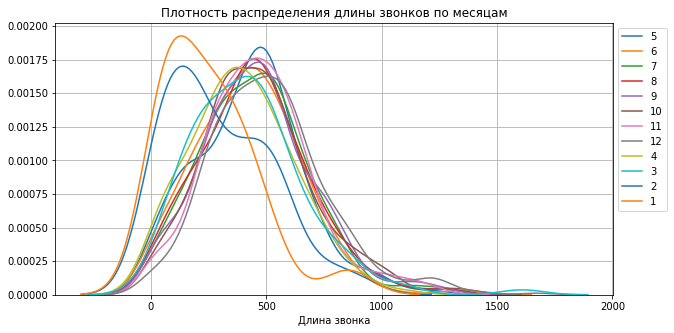

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
for month in df['month'].unique():
    sns.kdeplot(df[df['month']==month].duration_sum, label=month)
    
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Плотность распределения длины звонков по месяцам')
plt.xlabel('Длина звонка')
plt.show()

Итак, из графика видим, что распределение по всем месяцам одинаковое, кроме первых двух месяцев года. Также стоит заметить, что что пик длины разговор приходится на 500 минут. Такие данные можно объяснить тем, что большая часть клиентов перешли в данные тарифы весной или позже. Более того, тарифный план предусматривает как раз 500 мин плюс, если считать, что каждый день человек говорит 10-20 мин в день, то как раз выходит +-500 мин. 

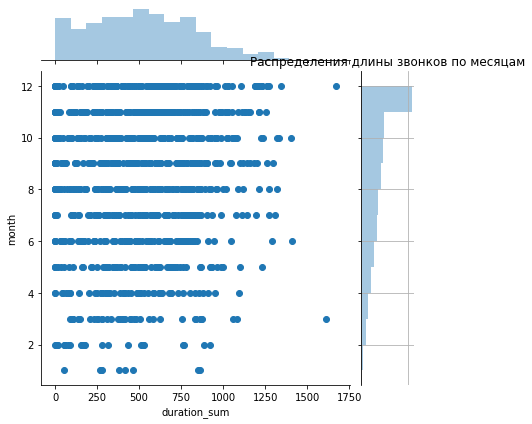

In [85]:
sns.jointplot(x='duration_sum', y='month', data=df_ultra, kind='scatter');
plt.grid(True)
plt.title('Распределения длины звонков по месяцам')
plt.show()

Как раз видим, что в первый месяц было мало клиентов с тарифом ultra, что и подтверждает нашу предыдущую позицию. Безусловно, существуют выбивающиеся значения в районе 1500-1750 минут, но основная часть пользователей тратит на разговоры 250-800 мин.

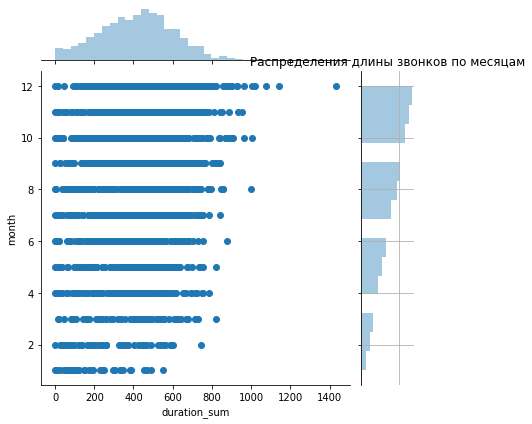

In [86]:
sns.jointplot(x='duration_sum', y='month', data=df_smart, kind='scatter');
plt.grid(True)
plt.title('Распределения длины звонков по месяцам')
plt.show()

Цифры новой таблицы существенно отличаются. Видим, что данные разброс более компактный, основная часть тратит на разговоры 300-500 мин.   

Посмотрим на данные за весь год.

In [87]:
df_year_calls=df.groupby('tariff').agg({'duration_sum': ['mean', 'var']})

In [88]:
df_year_calls.columns = ['mean', 'variance']

In [89]:
df_year_calls['standard_deviation']=np.sqrt(df_year_calls['variance'])

In [90]:
df_year_calls['mean']=df_year_calls['mean'].astype('int')

In [91]:
df_year_calls['variance']=df_year_calls['variance'].astype('int')

In [92]:
df_year_calls['standard_deviation']=df_year_calls['standard_deviation'].astype('int')

In [93]:
df_year_calls

,mean,variance,standard_deviation
tariff,,,
smart,417,36219,190
ultra,526,100873,317


Итак, в среднем пользователи тарифа Смарт укладываются в трафик 500 минут. И стандартный разброс не такой уж большой, который объясняется тем, что люди не хотят переплачивать за дополнительные минуты. Поэтому ситуация с другим тарифом совсем другая, его стандартное отклонение больше 300 минут. 

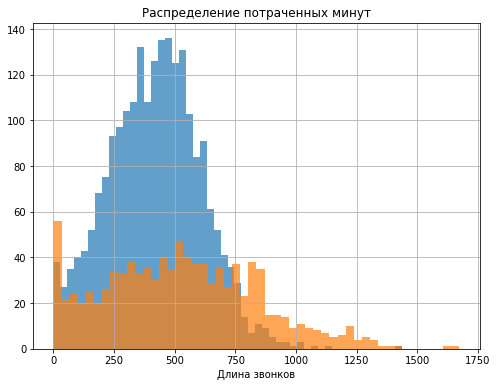

In [94]:
plt.figure(figsize=(8,6))
df.groupby('tariff')['duration_sum'].hist(bins=50, alpha=0.7)
plt.xlabel('Длина звонков')
plt.title('Распределение потраченных минут')
plt.show()

Видим, что распределения у разных тарифов сильно отличаются. У тарифа Смарт нормальное распределение, а у тарифа Ультра близкое к равномерному.

#### Вывод

Таким образом, в среднем люди тратят на разговоры 500 минут в месяц в не зависимости от тарифа. Отличие пользователей тарифов в том, что у тарифа Ультра больше клиентов которые очень любят поговорить.

<a id='7-bullet'></a>

#### Информация об интернете.

Теперь для каждого месяца посчитаем средние значение  количества mb, дисперсию и стандартное отклонение  отдельно для тарифа ultra и  smart.

In [95]:
df_ultra_mb=df_ultra.groupby('month').agg({'mb_used_sum': ['mean', 'var']})

In [96]:
df_ultra_mb.columns = ['mean_ultra', 'variance_ultra']

In [97]:
df_ultra_mb['standard_deviation_ultra']=np.sqrt(df_ultra_mb['variance_ultra'])

In [98]:
df_smart_mb=df_smart.groupby('month').agg({'mb_used_sum': ['mean', 'var']})

In [99]:
df_smart_mb.columns = ['mean_smart', 'variance_smart']

In [100]:
df_smart_mb['standard_deviation_smart']=np.sqrt(df_smart_mb['variance_smart'])

Соединим таблицы.

In [101]:
mb=df_smart_mb.merge(df_ultra_mb, on=['month'], how='left')

In [102]:
mb.sample()

,mean_smart,variance_smart,standard_deviation_smart,mean_ultra,variance_ultra,standard_deviation_ultra
month,,,,,,
3,15091.688312,3.377483e+07,5811.611526,17522.297297,1.199890e+08,10953.948524


Изменем типы данных.

In [103]:
mb['mean_ultra']=mb['mean_ultra'].astype('int')

In [104]:
mb['mean_smart']=mb['mean_smart'].astype('int')

In [105]:
mb['standard_deviation_smart']=mb['standard_deviation_smart'].astype('int')

In [106]:
mb['standard_deviation_ultra']=mb['standard_deviation_ultra'].astype('int')

In [107]:
mb['variance_smart']=mb['variance_smart'].astype('int')

In [108]:
mb['variance_ultra']=mb['variance_ultra'].astype('int')

In [109]:
mb

,mean_smart,variance_smart,standard_deviation_smart,mean_ultra,variance_ultra,standard_deviation_ultra
month,,,,,,
1,8524,41626212,6451,13153,47226405,6872
2,11611,39119349,6254,11776,113261728,10642
3,15091,33774828,5811,17522,119988988,10953
4,13473,32522695,5702,16828,94517383,9722
5,15804,35606040,5967,19353,100750098,10037
6,15805,33516174,5789,18923,86199627,9284
7,15757,34841088,5902,20514,101477551,10073
8,16622,31329194,5597,19588,109774882,10477
9,16313,27025230,5198,19207,89916399,9482


С интернетом у нас похожая ситуация на ситуацию со звонками: количество потраченных мб растет с каждым месяцем у пользователей с тарифным планом smart. А вот стандартное отклонение, наоборот, уменьшается с каждым месяцем. Такая зависимость возможна из-за лимита 15000 мб в этом тарифе. 
У тарифа ultra также как и со звонками не наблюдается четкого роста количества потраченного интернета в среднем с каждым месяцем. Но при этом видим стабильность со стандартным отклонением в районе 10000.

Давайте посмотрим на следующие таблицы.

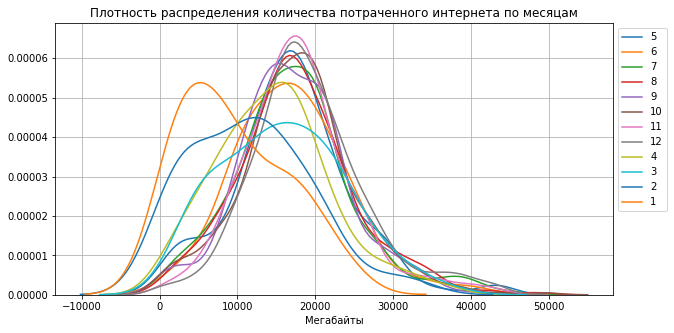

In [110]:
fig, ax = plt.subplots(figsize=(10, 5))
for month in df['month'].unique():
    sns.kdeplot(df[df['month']==month].mb_used_sum, label=month)
    
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Плотность распределения количества потраченного интернета по месяцам')
plt.xlabel('Мегабайты')
plt.show()

Опять видим выбивающиеся кривые, обозначающие распределение интернета в январе, феврале и марте. В остальные месяцы все выравнивается и мы видим, что пик приходится на 15000-20000 мб.

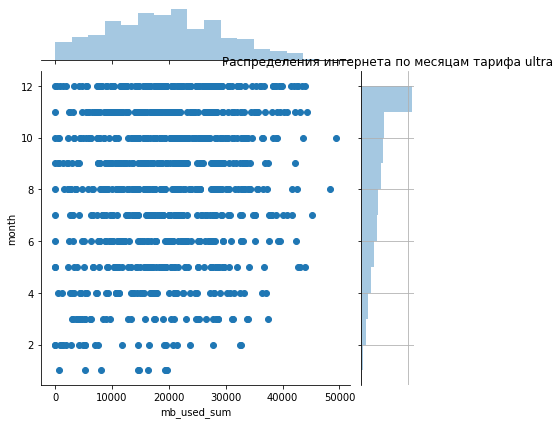

In [111]:
sns.jointplot(x='mb_used_sum', y='month', data=df_ultra, kind='scatter');
plt.grid(True)
plt.title('Распределения интернета по месяцам тарифа ultra')
plt.show()

Действительно пользователей ultra в первые месяцы было мало. Самая большая плотность распредедления приходится на 15000-30000.

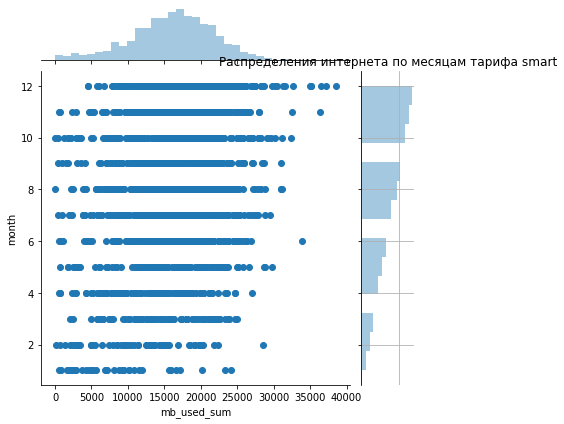

In [112]:
sns.jointplot(x='mb_used_sum', y='month', data=df_smart, kind='scatter');
plt.grid(True)
plt.title('Распределения интернета по месяцам тарифа smart')
plt.show()

А вот пользователей smart было больше в первый месяц, что и повлияло на общую статистику к уменьшению расхода трафика. Видим нормальное распределение , где пик приходится на 16000 мб.

Теперь посмотрим на ситуацию в 2018 году в общем.

In [113]:
df_year_mb=df.groupby('tariff').agg({'mb_used_sum': ['mean', 'var']})

In [114]:
df_year_mb.columns = ['mean', 'variance']

In [115]:
df_year_mb['standard_deviation']=np.sqrt(df_year_mb['variance'])

In [116]:
df_year_mb['mean']=df_year_mb['mean'].astype('int')

In [117]:
df_year_mb['variance']=df_year_mb['variance'].astype('int')

In [118]:
df_year_mb['standard_deviation']=df_year_mb['standard_deviation'].astype('int')

In [119]:
df_year_mb

,mean,variance,standard_deviation
tariff,,,
smart,16215,34450758,5869
ultra,19470,101614329,10080


Видим, что пользователи Смарт переиспользуют трафик в 15 гб. Также хочется заметить, что пользователи Ультра тратят примерно столько же интернета, как и остальные пользователи, но при этом разброс значений у Ультра в два раза больше, что можно объяснить, так как трафик у них более расширеннный

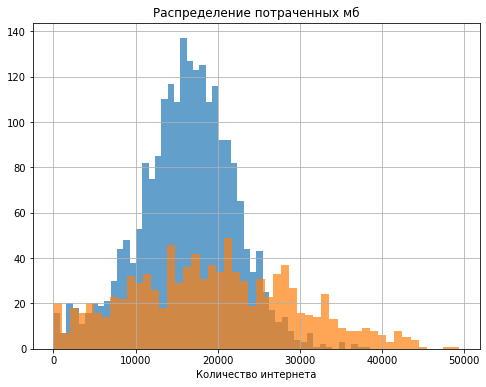

In [120]:
plt.figure(figsize=(8,6))
df.groupby('tariff')['mb_used_sum'].hist(bins=50, alpha=0.7)
plt.xlabel('Количество интернета')
plt.title('Распределение потраченных мб')
plt.show()

Видим, что пользователи Ультра равномерно используют свой интернет, то есть одинаковое количество людей, которые тратят 10 гб , так и людей, которые тратят 30 гб. У пользователей Смарт такого распределения нет. Есть пик в районе 15 гб.

#### Вывод 

Таким образом, большинство пользователей тарифа  smart превышают трафик в 15  гб, а пользователи другого тарифа не всегда расходуют весь трафик. Однако тенденция того, что пользователи  smart тратят меньше предоставленных услуг(интернет, звонки) остается. 

<a id='8-bullet'></a>

#### Информация о сообщениях.

Теперь для каждого месяца посчитаем средние значение  количества sms, дисперсию и стандартное отклонение  отдельно для тарифа ultra и  smart.

In [121]:
df_ultra_sms=df_ultra.groupby('month').agg({'sms_count': ['mean', 'var']})

In [122]:
df_ultra_sms.columns = ['mean_ultra', 'variance_ultra']

In [123]:
df_ultra_sms['standard_deviation_ultra']=np.sqrt(df_ultra_sms['variance_ultra'])

In [124]:
df_smart_sms=df_smart.groupby('month').agg({'sms_count': ['mean', 'var']})

In [125]:
df_smart_sms.columns = ['mean_smart', 'variance_smart']

In [126]:
df_smart_sms['standard_deviation_smart']=np.sqrt(df_smart_sms['variance_smart'])

Соединим таблицы.

In [127]:
sms=df_smart_sms.merge(df_ultra_sms, on=['month'], how='left')

Изменем типы данных.

In [128]:
sms['mean_smart']=sms['mean_smart'].astype('int')

In [129]:
sms['mean_ultra']=sms['mean_ultra'].astype('int')

In [130]:
sms['standard_deviation_smart']=sms['standard_deviation_smart'].astype('int')

In [131]:
sms['standard_deviation_ultra']=sms['standard_deviation_ultra'].astype('int')

In [132]:
sms['variance_smart']=sms['variance_smart'].astype('int')

In [133]:
sms['variance_ultra']=sms['variance_ultra'].astype('int')

In [134]:
sms

,mean_smart,variance_smart,standard_deviation_smart,mean_ultra,variance_ultra,standard_deviation_ultra
month,,,,,,
1,18,262,16,33,940,30
2,24,473,21,21,716,26
3,31,718,26,32,1732,41
4,30,602,24,31,1407,37
5,33,730,27,37,1624,40
6,33,806,28,41,1986,44
7,33,799,28,49,2372,48
8,33,838,28,48,2171,46
9,33,790,28,52,2152,46


Видим, что число сообщение и стандартное отклонение росло с каждым месяцем в тарифе smart, что не скажешь о тарифе ультра. Но в среднем количество сообщений и стандартное отклонение у тарифа ультра больше чем у смарт.

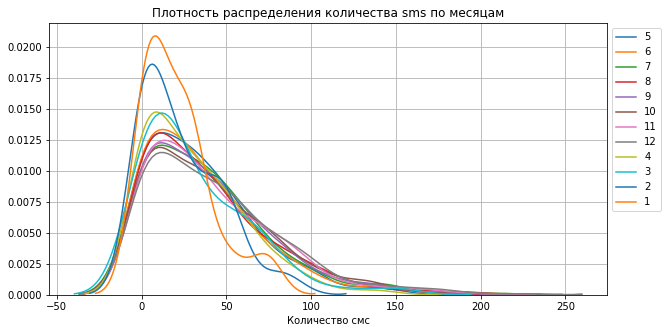

In [135]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 5))
for month in df['month'].unique():
    sns.kdeplot(df[df['month']==month].sms_count, label=month)
    
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title('Плотность распределения количества sms по месяцам')
plt.xlabel('Количество смс')
plt.show()

Видим, что большинство клиентов отправляли до 50 сообщений в не зависимости от месяца. Но опять же видим, что в первые месяцы ситуация немного иная.

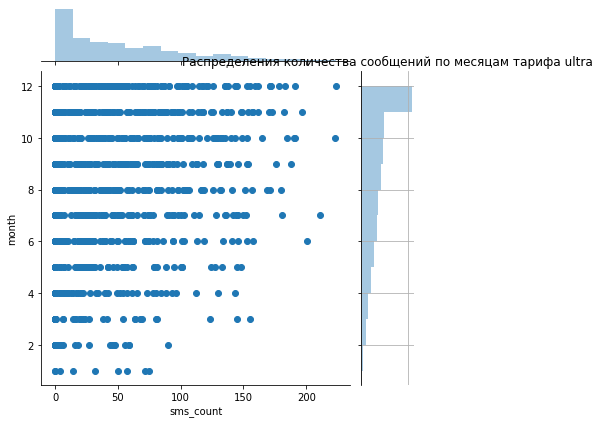

In [136]:
sns.jointplot(x='sms_count', y='month', data=df_ultra, kind='scatter');
plt.grid(True)
plt.title('Распределения количества сообщений по месяцам тарифа ultra')
plt.show()

Рассмотрим гистограмму по тарифу ультра. Видим, что пик количества сообщений приходится на 10 смс. Интересно, что никто из клиентов не потратил больше сообщений, чем предоставляют в тарифе.

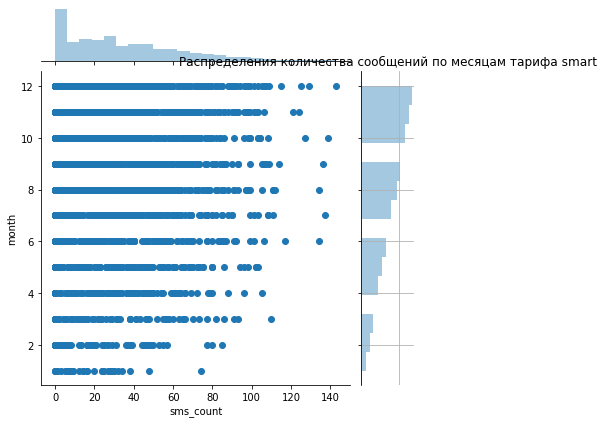

In [137]:
sns.jointplot(x='sms_count', y='month', data=df_smart, kind='scatter');
plt.grid(True)
plt.title('Распределения количества сообщений по месяцам тарифа smart')
plt.show()

Такая же ситуация и с тарифом смарт.

Теперь посмотрим на ситуацию с сообщениями по всему году.

In [138]:
df_year_sms=df.groupby('tariff').agg({'sms_count': ['mean', 'var']})

In [139]:
df_year_sms.columns = ['mean', 'variance']

In [140]:
df_year_sms['standard_deviation']=np.sqrt(df_year_sms['variance'])

In [141]:
df_year_sms['mean']=df_year_sms['mean'].astype('int')

In [142]:
df_year_sms['variance']=df_year_sms['variance'].astype('int')

In [143]:
df_year_sms['standard_deviation']=df_year_sms['standard_deviation'].astype('int')

In [144]:
df_year_sms

,mean,variance,standard_deviation
tariff,,,
smart,33,796,28
ultra,49,2285,47


Видим, что по всем параметрам тариф Смарт имеет меньшие значения, чем в тарифе Ультра.

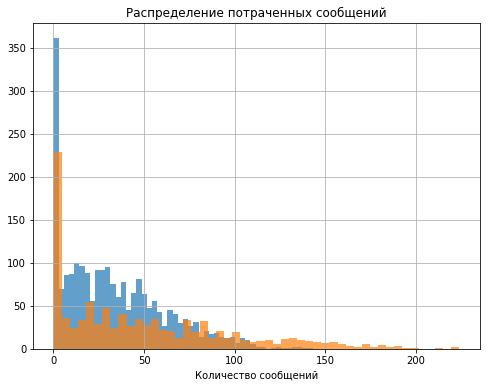

In [145]:
plt.figure(figsize=(8,6))
df.groupby('tariff')['sms_count'].hist(bins=50, alpha=0.7)
plt.xlabel('Количество сообщений')
plt.title('Распределение потраченных сообщений')
plt.show()

Видим, что большая часть клиентов совсем немного общается через сообщения, но именно у тарифного плана Ультра есть клиенты, которые тратят более 150 сообщений в месяц, поэтому можем сказать, что у тарифа Смарт более компактное распределение.

### Вывод

Разброс данных был очень высоким, поэтому средние значение выше, чем число, которое мы увидели на гистограмме.

В среднем люди мало общаются через смс.

## Проверка гипотез

<a id='9-bullet'></a>

### Выручка пользователей тарифов «Ультра» и «Смарт»

Нулевая гипотеза: выручка пользователей тарифов "Ультра" и "Смарт" равны.

Альтернативная гипотеза: выручка пользователей тарифов "Ультра" и "Смарт" не равны.

In [146]:
results = st.ttest_ind(df_ultra['price'], df_smart['price'])
alpha = .05

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.25963210487406e-152
Отвергаем нулевую гипотезу


Мы получили, что выручка не равна, проверим какой тариф для компании выгоднее.

Нулевая гипотеза: выручка пользователей тарифа "Ультра" больше, чем тарифа "Смарт".

Альтернативная гипотеза: выручка пользователей тарифа "Ультра" меньше, чем тарифа "Смарт".

In [147]:
results = st.ttest_ind(df_ultra['price'], df_smart['price'])

print('p-значение:', results.pvalue/2)

if (results.pvalue/2 < alpha) and (df_ultra['price'].mean() < df_smart['price'].mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.62981605243703e-152
Не получилось отвергнуть нулевую гипотезу


### Вывод

Таким образом, средняя выручка пользователей тарифов «Ультра» и «Смарт» различается, причем средняя выручка пользователей тарифа "Смарт" меньше, чем "Ультра".

<a id='10-bullet'></a>

###  Выручка пользователей из Москвы отличается от других регионов

In [148]:
df_moscow=df.query('city=="Москва"')
df_moscow['price'].var()

572474.0860722814

In [149]:
df_region=df.query('city!="Москва"')
df_region['price'].var()

669188.224992566

Нулевая гипотеза:  средняя выручка пользователей из Москвы равна выручки пользователей из других регионов.

Альтернативная гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [150]:
results = st.ttest_ind(df_moscow['price'], df_region['price'], equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5529497116393323
Не получилось отвергнуть нулевую гипотезу


### Вывод

Таким образом, средняя выручка пользователей из Москвы равна выручки пользователей из других регионов.

<a id='11-bullet'></a>

## Общий вывод

Итак, средняя выручка не зависит от того, живет ли клиент в столице или нет. Но при этом средняя выручка существенно отличается от того, какой тариф клиент выбрал. Конечно, для нас выгодно, чтобы люди пользовались тарифом "Ультра".

Однако если смотреть со стороны клиентов, то выгоднее брать тариф smart, так как в среднем минуты и сообщение используются по трафику, а за интернет легче доплатить за переиспользованные гигабайты. В среднем выходит дешевле, чем брать тариф с расширенным трафиком.

Обобщая вышеизложенные доводы, мы пришли к выводу, что компании следует вложиться в рекламу тарифа "Ультра" или же изменить тарифный план "Ультра", сделав его более приемлемым для клиентов в среднем, чтобы привлечь людей не только рекламой, но и выгодой для них.